In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
import json,pickle,joblib

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv',index_col=0)
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Data Exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [5]:
train.shape

(4250, 20)

we can see customer churn in USA states there

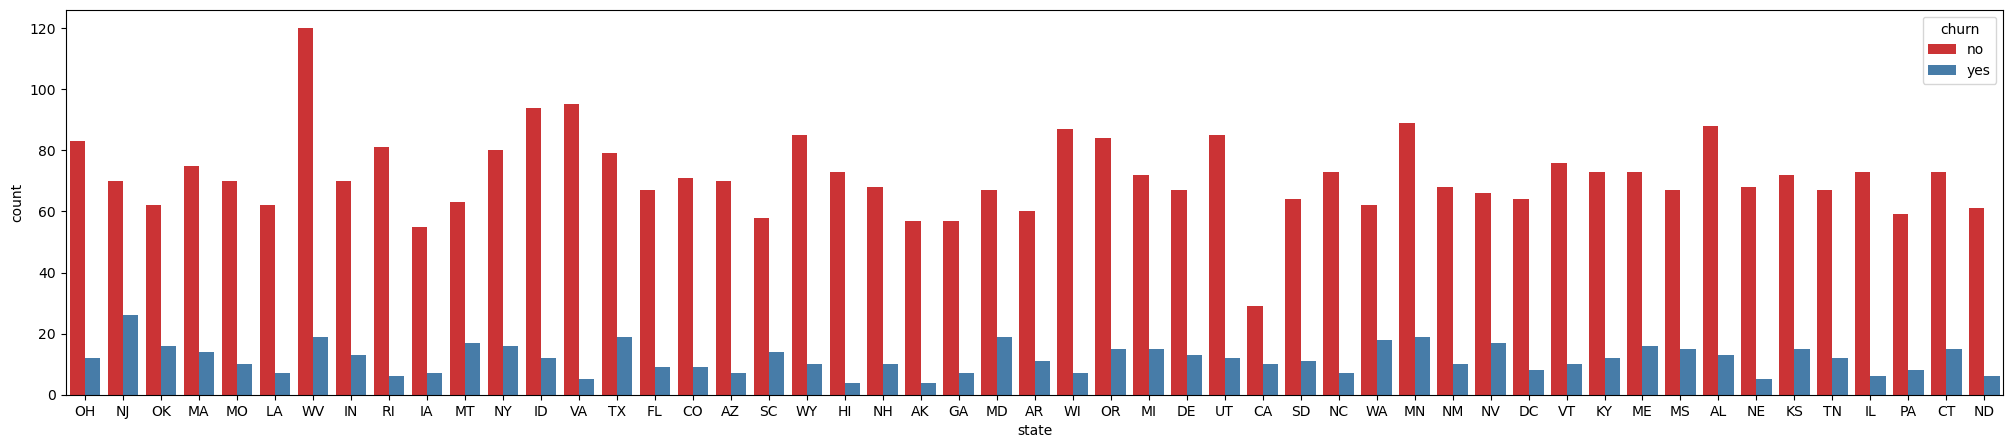

In [6]:
plt.figure(figsize=(25,5))
sns.countplot(data=train,x='state',hue='churn',palette='Set1')
plt.show()

There, some numerical statistics are visualized

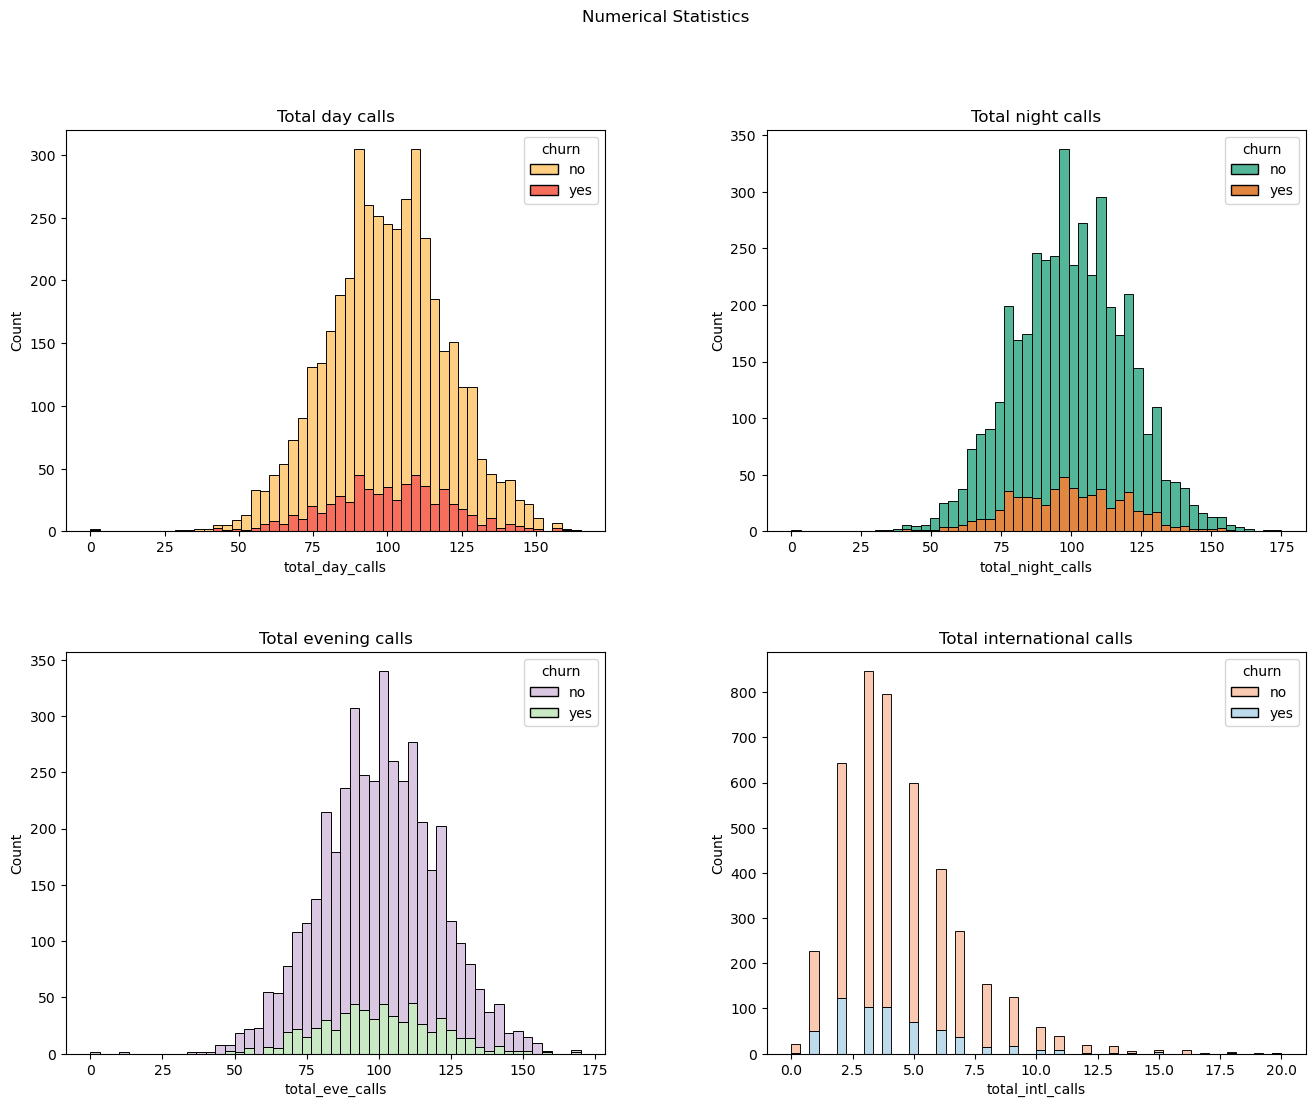

In [7]:
fig,ax=plt.subplots(2,2,figsize=(16,12))
fig.suptitle('Numerical Statistics')
fig.subplots_adjust(wspace=0.3,hspace=0.3)

sns.histplot(ax=ax[0,0],data=train,x='total_day_calls',hue='churn',multiple='stack',palette='YlOrRd')
ax[0,0].set_title('Total day calls')
sns.histplot(ax=ax[0,1],data=train,x='total_night_calls',hue='churn',multiple='stack',palette='Dark2')
ax[0,1].set_title('Total night calls')
sns.histplot(ax=ax[1,0],data=train,x='total_eve_calls',hue='churn',multiple='stack',palette='PRGn')
ax[1,0].set_title('Total evening calls')
sns.histplot(ax=ax[1,1],data=train,x='total_intl_calls',hue='churn',multiple='stack',palette='RdBu')
ax[1,1].set_title('Total international calls')
plt.show()

Confusion matrix help us to define correlation with each other

In [8]:
confusion=train.corr().abs()
confusion.style.background_gradient(cmap='coolwarm')

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,0.006626,0.001612,0.023002,0.001613,0.010326,0.005535,0.010322,0.009916,0.001846,0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,0.006626,1.000000,0.002000,0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,0.015303
total_day_minutes,0.001612,0.002000,1.000000,0.000747,1.000000,0.013248,0.005986,0.013258,0.010049,0.004812,0.010036,0.021369,0.003859,0.021291,0.002925
total_day_calls,0.023002,0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,0.004815,0.002200,0.008834,0.009377,0.008909,0.015845
total_day_charge,0.001613,0.001994,1.000000,0.000751,1.000000,0.013247,0.005985,0.013257,0.010053,0.004816,0.010040,0.021374,0.003853,0.021296,0.002932
total_eve_minutes,0.010326,0.010725,0.013248,0.008661,0.013247,1.000000,0.003101,1.000000,0.014018,0.011973,0.014031,0.003509,0.012239,0.003460,0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,0.011929,0.008441,0.013096,0.004949,0.013145,0.006956
total_eve_charge,0.010322,0.010736,0.013258,0.008663,0.013257,1.000000,0.003120,1.000000,0.014022,0.011971,0.014035,0.003512,0.012239,0.003463,0.010071
total_night_minutes,0.009916,0.018308,0.010049,0.002206,0.010053,0.014018,0.008425,0.014022,1.000000,0.023815,0.999999,0.000113,0.024280,0.000047,0.013771
total_night_calls,0.001846,0.001977,0.004812,0.004815,0.004816,0.011973,0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,0.008893


In [9]:
columns=['state','account_length','area_code','international_plan','voice_mail_plan','churn']
def encoding(data,cols):
    encoder=LabelEncoder()
    for col in cols:
        data[col]=encoder.fit_transform(data[col])
encoding(train,columns)
encoding(test,columns[:-1])

In [10]:
train.corrwith(train.churn).abs().sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
voice_mail_plan                  0.114643
number_vmail_messages            0.100347
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
total_intl_calls                 0.034334
account_length                   0.019100
total_night_calls                0.012699
total_day_calls                  0.011640
area_code                        0.010696
state                            0.007181
total_eve_calls                  0.006817
dtype: float64

In [11]:
train_X=train.drop('churn',axis=1).values
train_y=train['churn'].values
test_X=test.values

In [12]:
def get_param(x,y,model,hyper):
    params={hyper:np.arange(1,25)}
    gsCV=GridSearchCV(model,params,cv=5)
    gsCV.fit(x,y)
    return gsCV.best_params_

In [13]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(train_X,train_y)
predict_knn=knn.predict(test_X)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
X=train.drop('churn',axis=1).values
y=train['churn'].values

## Checking

Before training and testing original data, I prefer to do it for only train data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3400, 19), (850, 19))

I use some classification models to find which model predict accurately

#### KNeighborsClassifier()

In [23]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
predict_knn=knn_model.predict(X_test)
knn_accuracy=accuracy_score(y_test,predict_knn)
knn_accuracy

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8870588235294118

In [24]:
get_param(X_train,y_train,knn_model,'n_neighbors')

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

{'n_neighbors': 9}

#### DecisionTreeClassifier()

In [25]:
tree_model=DecisionTreeClassifier(random_state=79)
tree_model.fit(X_train,y_train)
predict_tree=tree_model.predict(X_test)
tree_accuracy=accuracy_score(y_test,predict_tree)
print('Accuracy: ',tree_accuracy)
print(classification_report(y_test,predict_tree))

Accuracy:  0.9152941176470588
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       721
           1       0.72      0.73      0.72       129

    accuracy                           0.92       850
   macro avg       0.83      0.84      0.84       850
weighted avg       0.92      0.92      0.92       850



#### RandomForestClassifier()

In [26]:
RF_model=RandomForestClassifier(n_estimators=15,random_state=66)
RF_model.fit(X_train,y_train)
predict_RF=RF_model.predict(X_test)
RF_accuracy=accuracy_score(y_test,predict_RF)
print('Accuracy: ',RF_accuracy)
print(classification_report(y_test,predict_RF))

Accuracy:  0.9576470588235294
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       721
           1       0.93      0.78      0.85       129

    accuracy                           0.96       850
   macro avg       0.94      0.89      0.91       850
weighted avg       0.96      0.96      0.96       850



In [27]:
get_param(X_train,y_train,RF_model,'n_estimators')

{'n_estimators': 15}

#### XGBClassifier()

In [28]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
predict_xgb=xgb_model.predict(X_test)
xgb_accuracy=accuracy_score(y_test,predict_xgb)
print('Accuracy: ',xgb_accuracy)
print(classification_report(y_test,predict_xgb))

Accuracy:  0.9647058823529412
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.95      0.81      0.88       129

    accuracy                           0.96       850
   macro avg       0.96      0.90      0.93       850
weighted avg       0.96      0.96      0.96       850



#### SVC()- Support Vector machine algorithm (for classification)

In [29]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
predict_svc=svc_model.predict(X_test)
svc_accuracy=accuracy_score(y_test,predict_svc)
print('Accuracy: ',svc_accuracy)
print(classification_report(y_test,predict_svc))

Accuracy:  0.851764705882353
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       1.00      0.02      0.05       129

    accuracy                           0.85       850
   macro avg       0.93      0.51      0.48       850
weighted avg       0.87      0.85      0.79       850



### Overall Conclusion

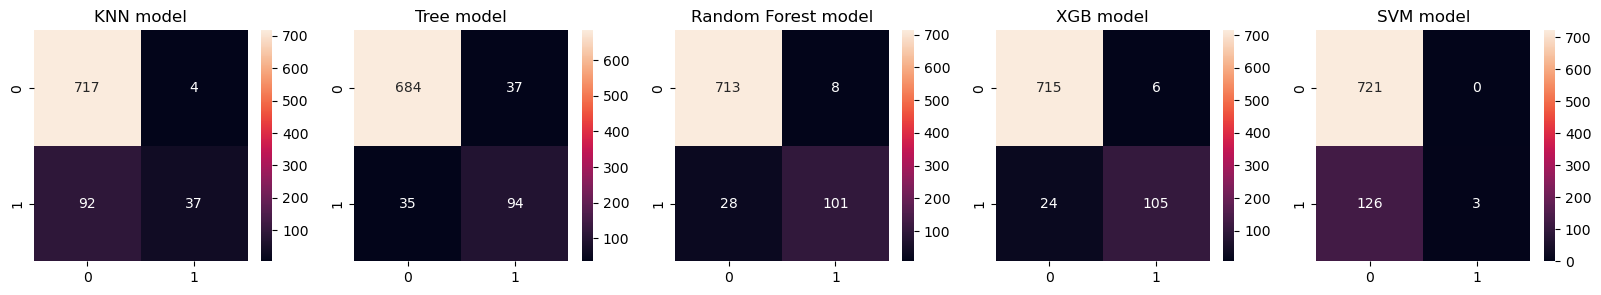

In [33]:
arr=[confusion_matrix(y_test,predict_knn),
     confusion_matrix(y_test,predict_tree),
     confusion_matrix(y_test,predict_RF),
     confusion_matrix(y_test,predict_xgb),
     confusion_matrix(y_test,predict_svc),]
confusions=np.array(arr)
i,j=1,5
titles_matrix=np.array(['KNN model','Tree model','Random Forest model','XGB model','SVM model'])
fig,ax=plt.subplots(i,j,figsize=(20,3))
#axes=[[a,b] for a in range(i) for b in range(j)]
#fig.suptitle('Overall Conclusion')

for m  in range(len(arr)):
    sns.heatmap(confusions[m],ax=ax[m],annot=True,fmt='g')
    ax[m].set_title(titles_matrix[m])
    m+=1


plt.show()

#### Conclusion: XGB is best predictor models for our data

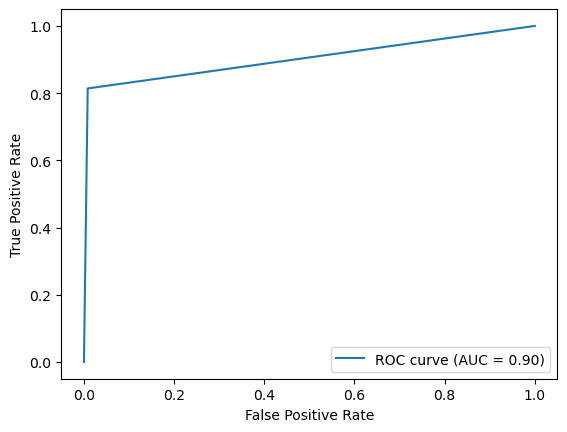

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,predict_xgb)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()

plt.show()

# Actual data pediction

In [35]:
pred_test=xgb_model.predict(test_X)

In [72]:
models=[xgb_model,RF_model]
filenames_jbl=['XGB.jbl','Random_Forest.jbl']
i=0
for f in filenames_jbl:
    with open(f,'wb') as file:
        joblib.dump(models[i],file)
    i+=1    

In [73]:
filenames_pkl=['XGB.pkl','Random_Forest.pkl']
j=0
for f in filenames_pkl:
    with open(f,'wb') as file:
        pickle.dump(models[j],file)
        j+=1

In [62]:
pred_test[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [68]:
submit={'churn':pred_test}
submission=pd.DataFrame(submit,index=np.arange(1,len(test)+1))
submission.index.name='id'
submission.head()

,churn
id,
1,0
2,0
3,1
4,0
5,0


In [69]:
submission.shape

(750, 1)

In [70]:
submission.to_csv('submission.csv')